In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Set plotting defaults for notebooks
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
sns.set(style='whitegrid') 

In [2]:
# Load data
csv_path = r"D:/AI_Intern/ScreenTime vs MentalWellness.csv"
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV not found at: {csv_path}. Please check the path and try again.")

In [5]:
df = pd.read_csv(csv_path)
print('\nDataset loaded.\nShape:', df.shape)
print('\nColumns:')
print(df.columns.tolist())


Dataset loaded.
Shape: (400, 16)

Columns:
['user_id', 'age', 'gender', 'occupation', 'work_mode', 'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours', 'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10', 'productivity_0_100', 'exercise_minutes_per_week', 'social_hours_per_week', 'mental_wellness_index_0_100', 'Unnamed: 15']


In [6]:
print('\n--- First 5 rows ---')
df.head()


--- First 5 rows ---


,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3,NaN
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2,NaN
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6,NaN
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0,NaN
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0,NaN


In [7]:
print('\n--- Info ---')
df.info()


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercise_minutes_per_week    400 non-null    int64  
 13  social

In [8]:
print('\n--- Missing values per column ---')
print(df.isna().sum())


--- Missing values per column ---
user_id                          0
age                              0
gender                           0
occupation                       0
work_mode                        0
screen_time_hours                0
work_screen_hours                0
leisure_screen_hours             0
sleep_hours                      0
sleep_quality_1_5                0
stress_level_0_10                0
productivity_0_100               0
exercise_minutes_per_week        0
social_hours_per_week            0
mental_wellness_index_0_100      0
Unnamed: 15                    400
dtype: int64


In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('\nNumeric columns found:', numeric_cols)


Numeric columns found: ['age', 'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours', 'sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10', 'productivity_0_100', 'exercise_minutes_per_week', 'social_hours_per_week', 'mental_wellness_index_0_100', 'Unnamed: 15']


In [11]:
# Summary statistics 
summary = pd.DataFrame(index=numeric_cols)
summary['count'] = df[numeric_cols].count()
summary['mean'] = df[numeric_cols].mean()
summary['median'] = df[numeric_cols].median()
summary['mode'] = df[numeric_cols].mode().iloc[0]
summary['std'] = df[numeric_cols].std()
summary['min'] = df[numeric_cols].min()
summary['max'] = df[numeric_cols].max()
summary['25%'] = df[numeric_cols].quantile(0.25)
summary['75%'] = df[numeric_cols].quantile(0.75)


print('\n--- Summary statistics ---')
summary


--- Summary statistics ---


,count,mean,median,mode,std,min,max,25%,75%
age,400,29.777500,30.000,32.00,7.466080,16.00,60.00,24.0000,35.0000
screen_time_hours,400,9.024900,9.090,7.77,2.491058,1.00,19.17,7.3725,10.4950
work_screen_hours,400,2.183075,1.455,0.45,1.931321,0.11,12.04,0.6950,3.0125
leisure_screen_hours,400,6.841825,6.700,6.28,2.220896,0.89,13.35,5.4600,8.4175
sleep_hours,400,7.013175,7.030,6.39,0.852421,4.64,9.74,6.3975,7.6400
sleep_quality_1_5,400,1.397500,1.000,1.00,0.652348,1.00,4.00,1.0000,2.0000
stress_level_0_10,400,8.150500,8.800,10.00,2.094844,0.00,10.00,6.9000,10.0000
productivity_0_100,400,54.306500,51.750,50.40,15.020054,20.60,100.00,43.6000,63.0000
exercise_minutes_per_week,400,109.810000,103.000,0.00,70.007045,0.00,372.00,58.0000,157.0000
social_hours_per_week,400,7.905000,7.750,0.00,4.909632,0.00,23.90,4.5750,11.0250


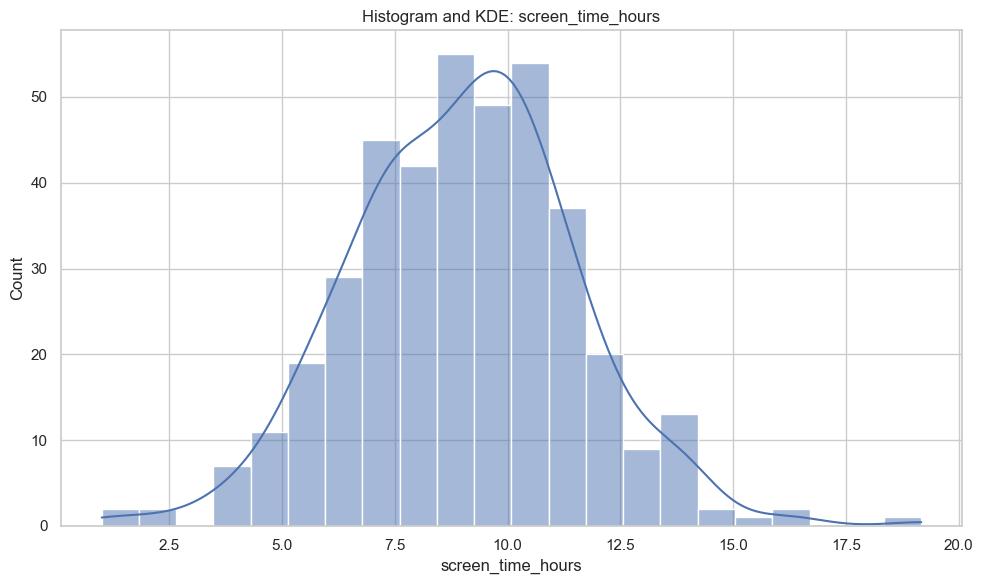

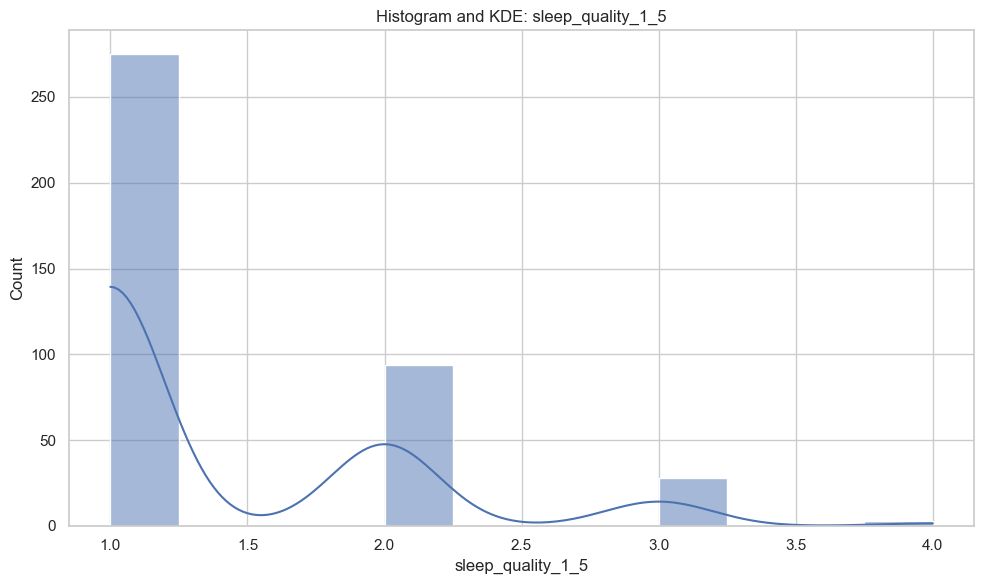

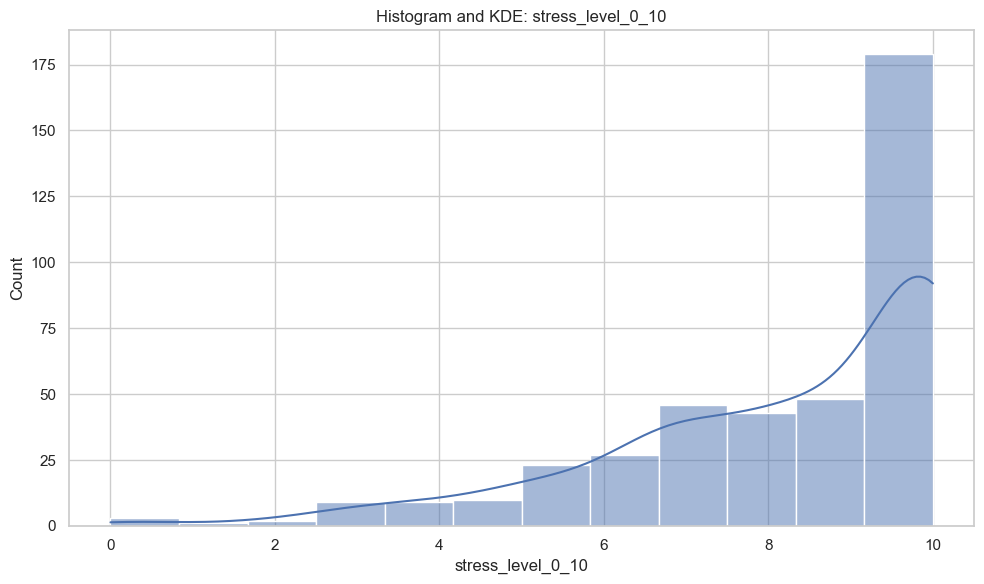

In [21]:
# Histograms for numeric features

for col in ['screen_time_hours','sleep_quality_1_5', 'stress_level_0_10']:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram and KDE: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

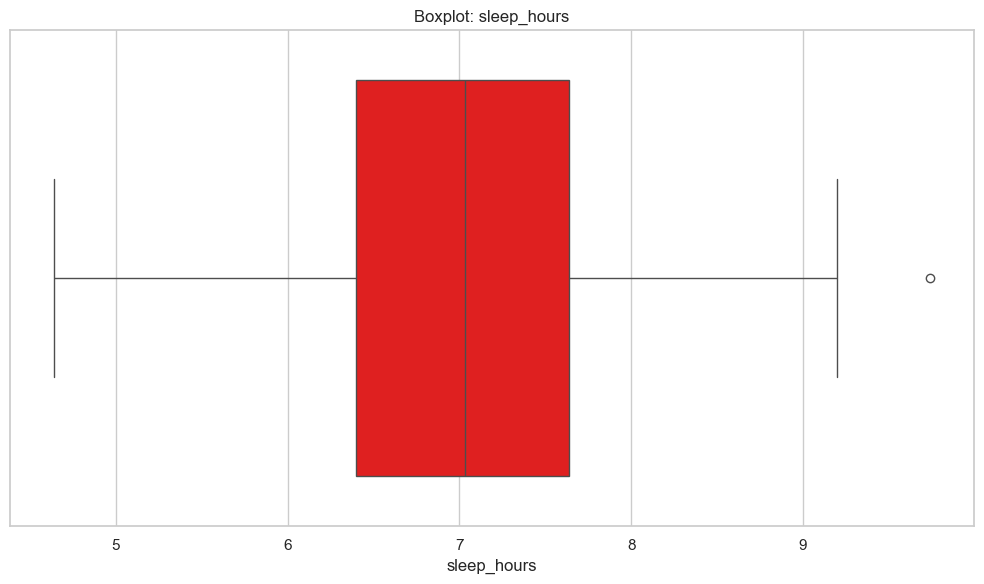

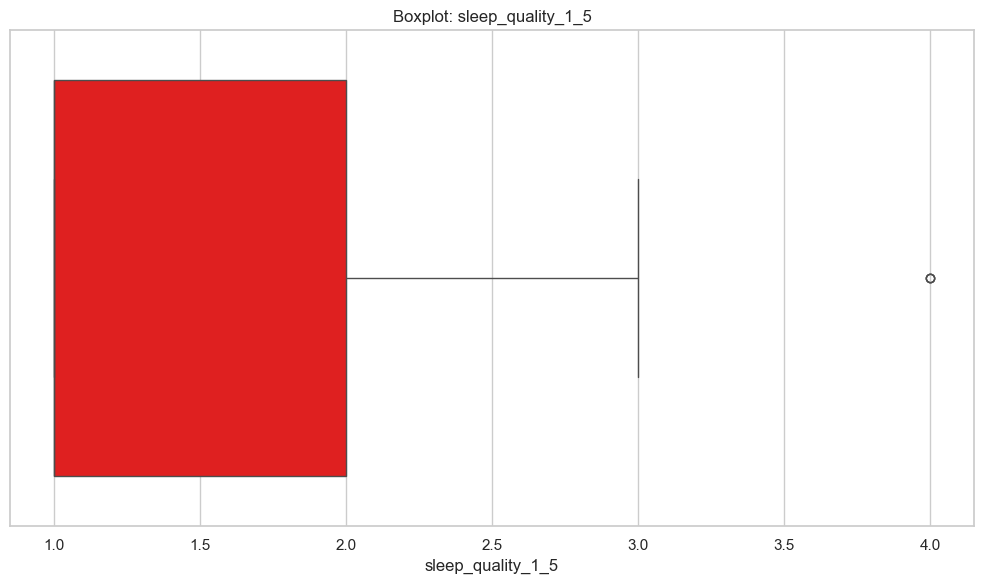

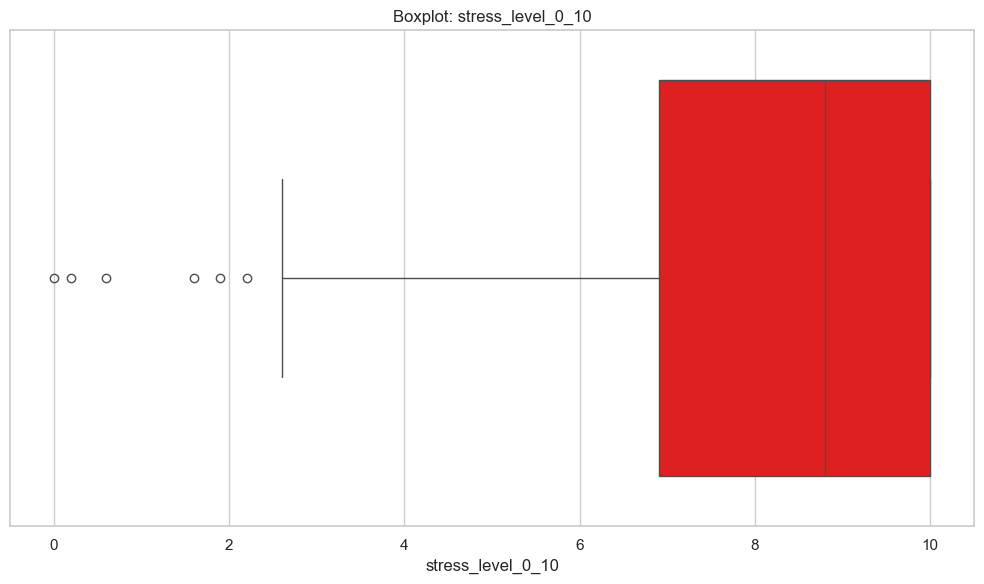

In [47]:
# Boxplots for numeric features
for col in ['sleep_hours', 'sleep_quality_1_5', 'stress_level_0_10']:
    plt.figure()
    sns.boxplot(x=df[col].dropna(), color = "red")
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

There are 12 numeric cols — showing pairplot for first 6 columns: ['age', 'screen_time_hours', 'work_screen_hours', 'leisure_screen_hours', 'sleep_hours', 'sleep_quality_1_5']


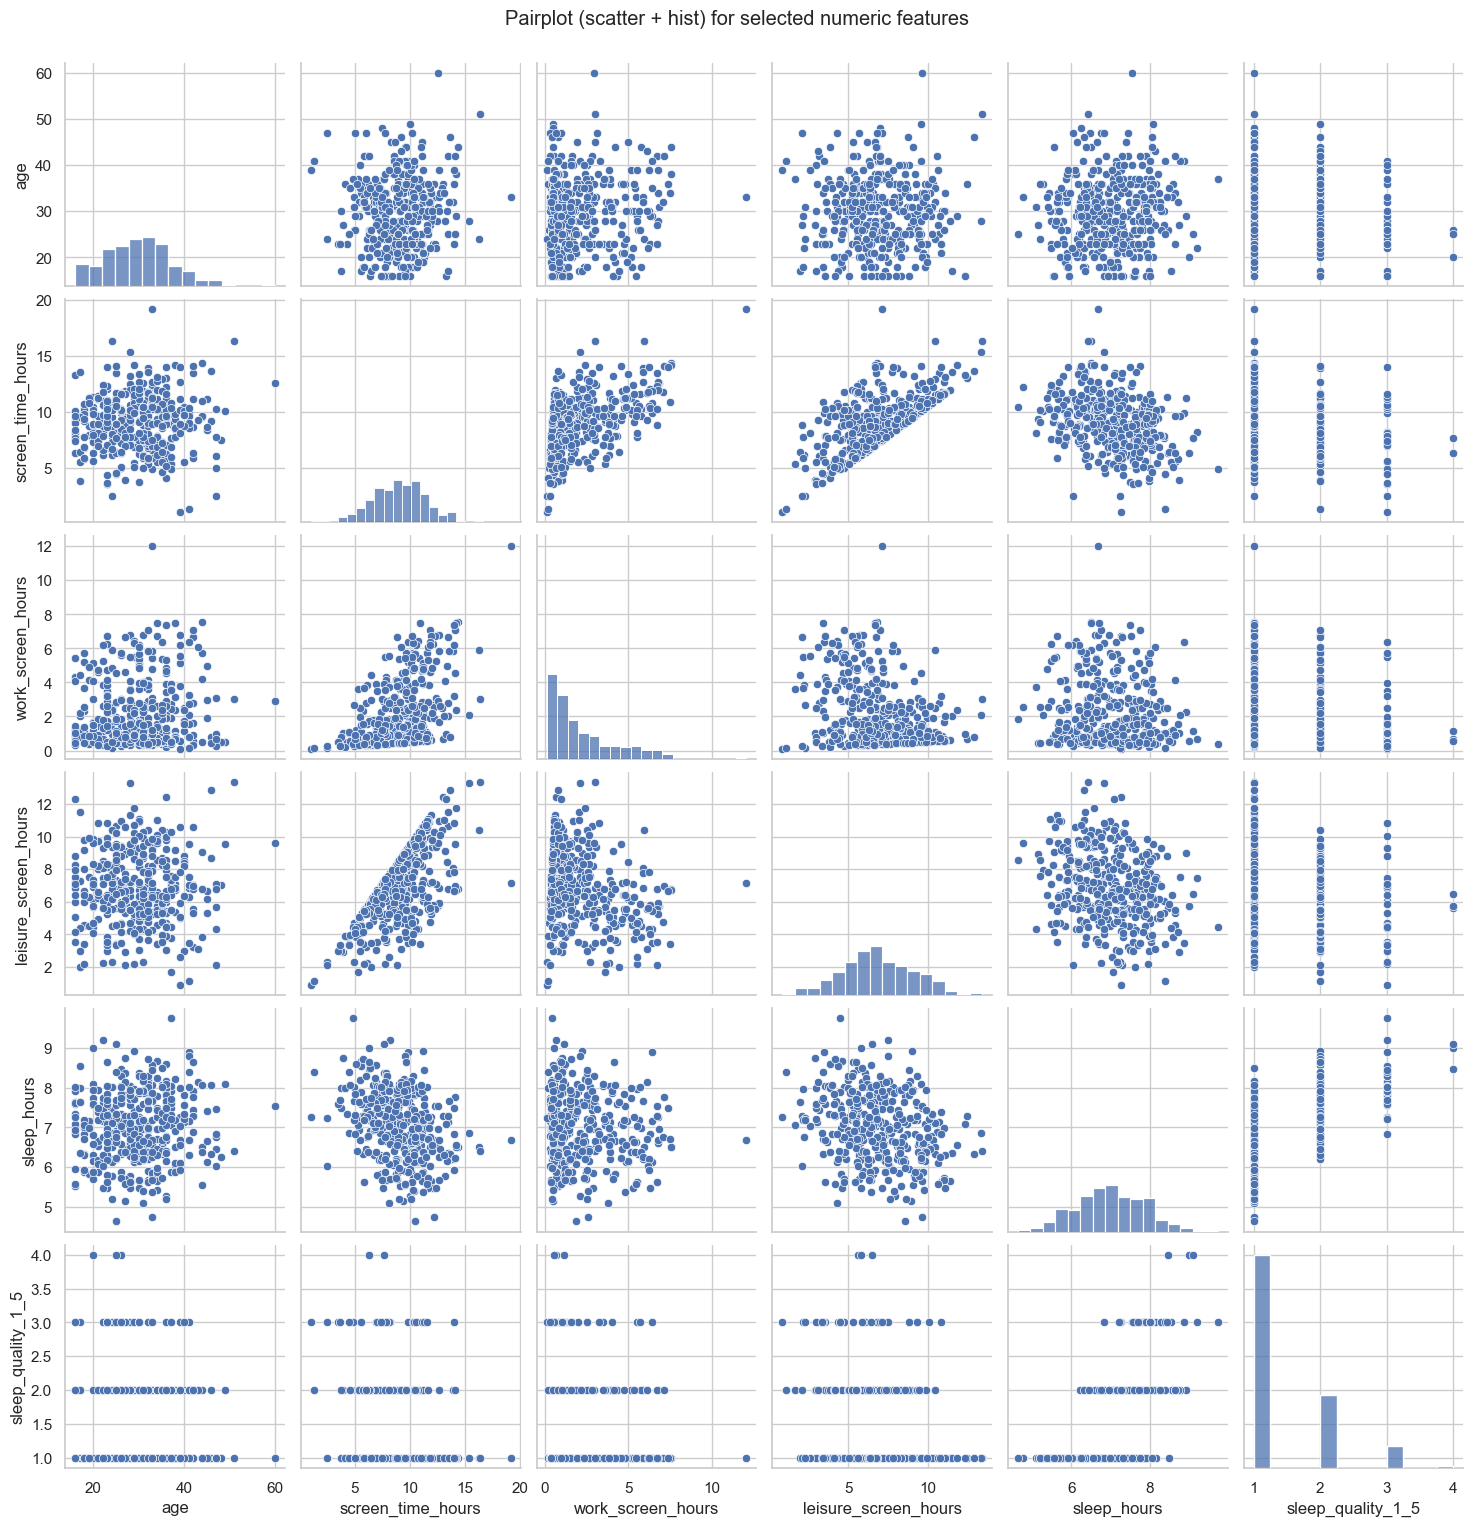

In [ ]:
# If there are many numeric columns, consider a reduced set or sampling
max_pairplot_columns = 6
if len(numeric_cols) > max_pairplot_columns:
    print(f"There are {len(numeric_cols)} numeric cols — showing pairplot for first {max_pairplot_columns} columns: {numeric_cols[:max_pairplot_columns]}")
    pair_cols = numeric_cols[:max_pairplot_columns]
else:
    pair_cols = numeric_cols


# Pairplot
sns.pairplot(df[pair_cols].dropna(), diag_kind='hist')
plt.suptitle('Pairplot (scatter + hist) for selected numeric features', y=1.02)
plt.show()

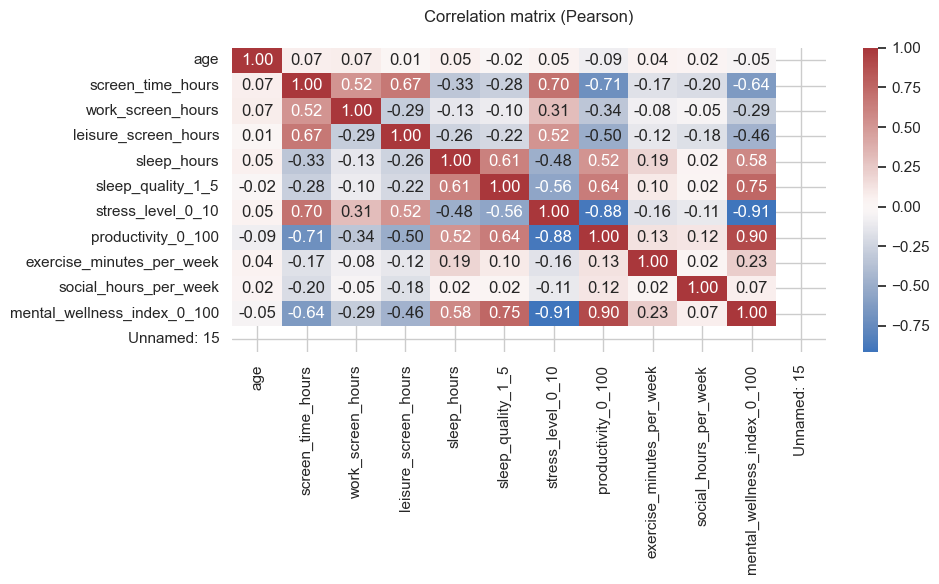

In [ ]:
# Correlation matrix 
corr = df[numeric_cols].corr(method='pearson')
plt.figure()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title('Correlation matrix (Pearson)\n')
plt.tight_layout()
plt.show()

In [ ]:
corr = df[numeric_cols].corr()

# threshold for "strong" correlation
threshold = 0.5

print("\n--- Correlation insights ---\n")
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        col1 = corr.columns[i]
        col2 = corr.columns[j]
        r = corr.iloc[i, j]

        if abs(r) >= threshold:
            if r > 0:
                relation = "positively correlated"
            else:
                relation = "negatively correlated"
            print(f"{col1} and {col2} are {relation} (r = {r:.2f})")


--- Correlation insights ---

screen_time_hours and work_screen_hours are positively correlated (r = 0.52)
screen_time_hours and leisure_screen_hours are positively correlated (r = 0.67)
screen_time_hours and stress_level_0_10 are positively correlated (r = 0.70)
screen_time_hours and productivity_0_100 are negatively correlated (r = -0.71)
screen_time_hours and mental_wellness_index_0_100 are negatively correlated (r = -0.64)
leisure_screen_hours and stress_level_0_10 are positively correlated (r = 0.52)
leisure_screen_hours and productivity_0_100 are negatively correlated (r = -0.50)
sleep_hours and sleep_quality_1_5 are positively correlated (r = 0.61)
sleep_hours and productivity_0_100 are positively correlated (r = 0.52)
sleep_hours and mental_wellness_index_0_100 are positively correlated (r = 0.58)
sleep_quality_1_5 and stress_level_0_10 are negatively correlated (r = -0.56)
sleep_quality_1_5 and productivity_0_100 are positively correlated (r = 0.64)
sleep_quality_1_5 and ment